<a href="https://colab.research.google.com/github/ai-nlp-gl/ticket-assignment/blob/Barath/Barath_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing Libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
import nltk 
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [0]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

## Get Required Files from Drive

In [0]:
#Reading CSV file         
df=pd.read_csv('input_data.csv')

In [0]:
# Viewing top 10 entries of data set
df.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r...,spxjnwir pjlcoqds,GRP_0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this...",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/,"event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/sr3psa1d_7/sr3psa1d.data7,perpsr3psa1d,4524 is 98",jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-employee [enter user's name],ticket_no1550391- employment status - new non-employee [enter user's name],eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [0]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


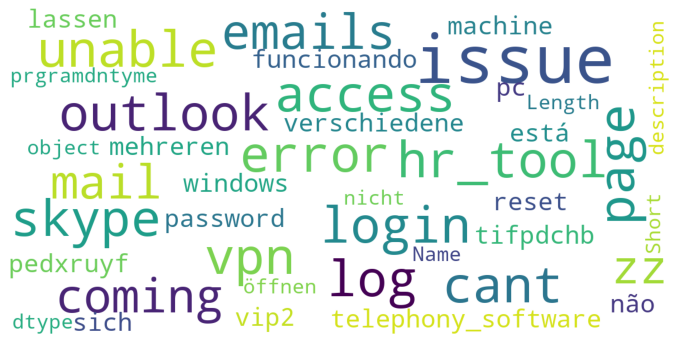

In [0]:
show_wordcloud(df['Short description'])

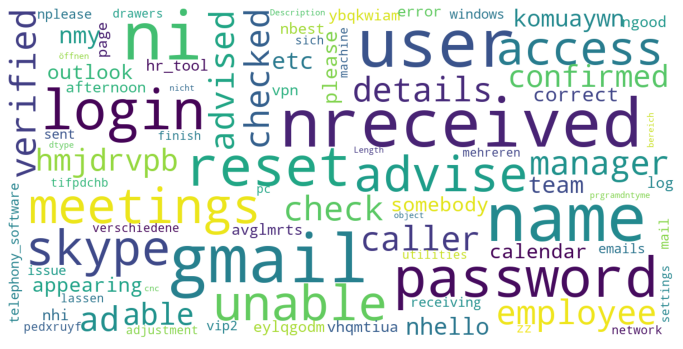

In [0]:
show_wordcloud(df['Description'])

In [0]:
# Depth Vs Breadth analysis 
df.shape

(8500, 4)

In [0]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8498,8499,8500,8500
unique,7482,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [0]:
df.isnull().sum()

Short description    2
Description          1
Caller               0
Assignment group     0
dtype: int64

In [0]:
def fillna():
  for i in df.index:
    if pd.isna(df.iloc[i,0]) and pd.isna(df.iloc[i,1]):
      data.drop(df.index[i])
    elif pd.isna(df.iloc[i,0]):
      df.iloc[i,0] = df.iloc[i,1]
    elif pd.isna(df.iloc[i,1]):
      df.iloc[i,1] = df.iloc[i,0]

In [0]:
fillna()

In [0]:
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [0]:
 # Understanding the data types of each column & coressponding null entries
df.info()
# 2 null entries in Short description column and 1 null entry Description column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [0]:
# Dropping the caller ID column as ticket classification depends only on words present in short and main description column
df1 = df.drop(['Caller'], axis = 1) 

In [0]:
# Viewing the dataset post dropping the caller column
df1.head(10)

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r...,GRP_0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this...",GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0
6,event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/,"event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/sr3psa1d_7/sr3psa1d.data7,perpsr3psa1d,4524 is 98",GRP_1
7,ticket_no1550391- employment status - new non-employee [enter user's name],ticket_no1550391- employment status - new non-employee [enter user's name],GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0


In [0]:
# Creating a replace function to remove the letters GRP_ from the dependent variable column
def myreplace(s):
    s = s.replace('GRP_', '')
    return s

In [0]:
# Calling the function 
df1['Assignment group'] = df1['Assignment group'].map(myreplace).astype(int)

In [0]:
# Viewing the dataset post replacing dependent variable data points
df1.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r...,0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this...",0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,0
3,unable to access hr_tool page,unable to access hr_tool page,0
4,skype error,skype error,0


In [0]:
# Verifying the data set post converting the data type of dependent variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Assignment group   8500 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 199.3+ KB


In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [0]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub(r'[^a-zA-z0-9]',' ' ,newString) 
    newString = re.sub(r'[´`]','', newString)
    newString = re.sub(r'[_^]', '',newString)
    newString = re.sub(r'[\\]','', newString)
    newString = re.sub(r'[][]',' ', newString)
    newString = re.sub(r' +',' ', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [0]:
#call the function
cleaned_Short_description = []
for t in df1['Short description']:
    cleaned_Short_description.append(text_cleaner(t,0)) 

In [0]:
cleaned_Short_description[:10]

['login issue',
 'outlook',
 'cant log vpn',
 'unable access hrtool page',
 'skype error',
 'unable log engineering tool skype',
 'event critical hostname221 company com value mountpoint threshold oracle sid37 erpdata21',
 'ticketno1550391 employment status new non employee enter user name',
 'unable disable add ins outlook',
 'ticket update inplant874773']

In [0]:
#call the function
cleaned_Decription = []
for t in df1['Description']:
    cleaned_Decription.append(text_cleaner(t,0)) 

In [0]:
cleaned_Decription[:10]

['verified user details checked user name ad reset password advised user login check caller confirmed able login issue resolved',
 'received hmjdrvpb komuaywn gmail com hello team meetings skype meetings etc appearing outlook calendar somebody please advise correct kind',
 'received eylqgodm ybqkwiam gmail com hi cannot log vpn best',
 'unable access hrtool page',
 'skype error',
 'unable log engineering tool skype',
 'event critical hostname221 company com value mountpoint threshold oracle sid37 erpdata21 sr3psa1d7 sr3psa1d data7 perpsr3psa1d 4524 98',
 'ticketno1550391 employment status new non employee enter user name',
 'unable disable add ins outlook',
 'ticket update inplant874773']

In [0]:
df1['Short description']=cleaned_Short_description
df1['Description']=cleaned_Decription

In [0]:
df1.head(10)

,Short description,Description,Assignment group
0,login issue,verified user details checked user name ad reset password advised user login check caller confirmed able login issue resolved,0
1,outlook,received hmjdrvpb komuaywn gmail com hello team meetings skype meetings etc appearing outlook calendar somebody please advise correct kind,0
2,cant log vpn,received eylqgodm ybqkwiam gmail com hi cannot log vpn best,0
3,unable access hrtool page,unable access hrtool page,0
4,skype error,skype error,0
5,unable log engineering tool skype,unable log engineering tool skype,0
6,event critical hostname221 company com value mountpoint threshold oracle sid37 erpdata21,event critical hostname221 company com value mountpoint threshold oracle sid37 erpdata21 sr3psa1d7 sr3psa1d data7 perpsr3psa1d 4524 98,1
7,ticketno1550391 employment status new non employee enter user name,ticketno1550391 employment status new non employee enter user name,0
8,unable disable add ins outlook,unable disable add ins outlook,0
9,ticket update inplant874773,ticket update inplant874773,0


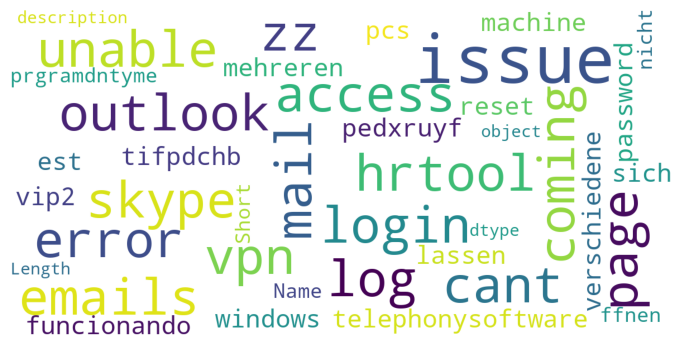

In [0]:
show_wordcloud(df1['Short description'])

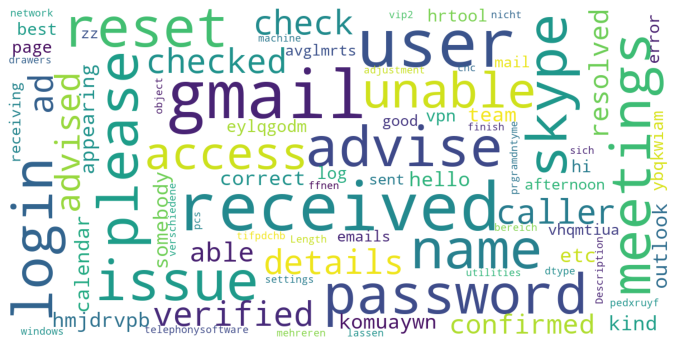

In [0]:
show_wordcloud(df1['Description'])

In [0]:
df1["whole_desc"] = np.nan

In [0]:
for i in df1.index:
  if df1.iloc[i,0] == df1.iloc[i,1]:
    df1.iloc[i,3] = df1.iloc[i,0]
  elif str(df1.iloc[i,0]) in str(df1.iloc[i,1]):
    df1.iloc[i,3] = df1.iloc[i,0] + ' ' + df1.iloc[i,1].replace(df1.iloc[i,0],'')
  else:
    df1.iloc[i,3] = df1.iloc[i,0] + ' ' + df1.iloc[i,1]

In [0]:
non_alnum = []
for col1 in df1.index:
  for w in df1["whole_desc"][col1]:
    if not w.isalnum():
      if w not in non_alnum:
        non_alnum.append(w)
        #print(str(w))

non_alnum

[' ']

In [0]:
df1.head()

,Short description,Description,Assignment group,whole_desc
0,login issue,verified user details checked user name ad reset password advised user login check caller confirmed able login issue resolved,0,login issue verified user details checked user name ad reset password advised user login check caller confirmed able resolved
1,outlook,received hmjdrvpb komuaywn gmail com hello team meetings skype meetings etc appearing outlook calendar somebody please advise correct kind,0,outlook received hmjdrvpb komuaywn gmail com hello team meetings skype meetings etc appearing calendar somebody please advise correct kind
2,cant log vpn,received eylqgodm ybqkwiam gmail com hi cannot log vpn best,0,cant log vpn received eylqgodm ybqkwiam gmail com hi cannot log vpn best
3,unable access hrtool page,unable access hrtool page,0,unable access hrtool page
4,skype error,skype error,0,skype error


In [0]:
max_length = 0
max_len_line = ''
file = df1["whole_desc"]
for line in file:
    if(len(line) > max_length):
        max_length = len(line)
        max_len_line = line
print(max_len_line)
print(max_length)

security incidents broadscanning possible vulnerability scanning 46 161 35 seeing activity indicating host 46 161 35 conducting vulnerability scan scans used identify specific vulnerabilities remote host could exploited potentially interfere service availability execute code usa attacker unauthorized access results scan could used future attacks exploitation targeted host based internet visibility detecting non targeted broadscan similar activity source detected across client base please consider blocking ip address investigating host malicious scrip escalating incident via medium priority ticket per default event handling procedures would like us handle incidents differently future questions concerns please let us know either corresponding us via ticket delegating ticket back soc calling us full escalation broadscanning alerts autoresolve broadscanning alerts directly portal sincerely secureworks soc event data related events event id 43589636 event summary 20369 vid12631 suspicious e

In [0]:
max_len = max([len(r.split()) for r in df1["whole_desc"]])
max_len

1709

#**## Modelling**

In [0]:
max_features = 10000
maxlen = 10303
embedding_size = 200

In [0]:
X = df1["whole_desc"]
y = df1["Assignment group"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [0]:
X_train.head()

720                                                                                         blank call
7508                                                                          account locked erp sid34
2569    job hrpayrollnau2 failed jobscheduler 10 02 2016 23 00 00 received monitoringtool company com 
7346                                                              unable connect network printer  dv06
3498                                             erp login information misplaced password reset needed
Name: whole_desc, dtype: object

In [0]:
y_train.head()

720      0
7508     0
2569    10
7346     0
3498     0
Name: Assignment group, dtype: int64

In [0]:
pipeline = Pipeline([
    ('vect', CountVectorizer()), #Step1 - normalize data
    ('clf', MultinomialNB()) #step2 - classifier
])
pipeline.steps


[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [0]:
scores = cross_validate(pipeline, X_train, y_train)
scores['test_score'].mean()

0.6169117647058824

In [0]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())


for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------
fit_time  mean  22.34828896522522
score_time  mean  0.049542903900146484
test_score  mean  0.6783823529411764
---------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  14.217968797683715
score_time  mean  1.593639087677002
test_score  mean  0.59
---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_si

In [0]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= RandomForestClassifier())
pipeline.steps

[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('clf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_star

In [0]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    
})

cv_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        p

In [0]:
pipeline1 = Pipeline([
    ('vect', CountVectorizer()), #Step1 - normalize data
    ('clf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False)) #step2 - classifier
])
pipeline1.steps

[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('clf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_star

In [0]:
scores = cross_validate(pipeline1, X_train, y_train)
scores['test_score'].mean()

0.6416176470588235

In [0]:
y_pred = model.predict(X_test)
y_pred

array([ 2,  0,  0, ..., 36, 13,  0])

In [0]:
print(model.score(X_test,y_test))
model_score = model.score(X_test,y_test)
print(model_score)

0.6935294117647058
0.6935294117647058


In [0]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6217647058823529
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       791
           1       0.00      0.00      0.00         7
           2       0.41      0.27      0.33        44
           3       0.33      0.02      0.04        43
           4       1.00      0.12      0.21        17
           5       0.00      0.00      0.00        19
           6       0.43      0.15      0.22        40
           7       0.00      0.00      0.00        12
           8       0.53      0.96      0.69       139
           9       0.33      0.02      0.04        50
          10       1.00      0.03      0.07        29
          11       0.00      0.00      0.00         2
          12       0.71      0.41      0.52        58
          13       0.36      0.31      0.33        26
          14       0.75      0.21      0.32        29
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00        14

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features, split='""')
tokenizer.fit_on_texts(df1['whole_desc'].values)

# Define X and y for your model.

In [0]:
X = tokenizer.texts_to_sequences(df1['whole_desc'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['Assignment group'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8500
[  0   0   0 ...   0   0 242]
Number of Labels:  8500
GRP_0


In [0]:
X

array([[   0,    0,    0, ...,    0,    0,  242],
       [   0,    0,    0, ...,    0,    0,  243],
       [   0,    0,    0, ...,    0,    0,  244],
       ...,
       [   0,    0,    0, ...,    0,    0, 7672],
       [   0,    0,    0, ...,    0,    0, 7673],
       [   0,    0,    0, ...,    0,    0, 7674]], dtype=int32)

In [0]:
expected = y_test
print(model.score(X_test,y_test))
model_score = model.score(X_test,y_test)
print(model_score)

In [0]:
print(metrics.confusion_matrix(expected,y_predicted))
print(metrics.classification_report(expected,y_predicted))

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [0]:
num_words = len(tokenizer.word_index) + 1

In [0]:
print(num_words)

6545


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = '/content/drive/My Drive/Sarcasm Detection/Data/glove.6B.zip'

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [0]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [0]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix])
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(8, return_sequences = True, recurrent_dropout=0.2)))
model.add(Dense(1,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 200)         1309000   
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 16)          13376     
_________________________________________________________________
dense_9 (Dense)              (None, None, 1)           17        
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 1)           0         
_________________________________________________________________
dense_10 (Dense)             (None, None, 1)           2         
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 1)          

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [0]:
batch_size = 1
epochs = 1
history = model.fit(X_train,y_train,batch_size = batch_size,epochs=epochs,validation_data=(X_test,y_test))

In [0]:
score, acc = model.evaluate(X_test, y_test,batch_size=100, verbose =2)
print('Score:%.2f'%(score))
print('Accuracy:%.2f'%(acc))

54/54 - 11s - loss: 0.6854 - accuracy: 0.5674
Score:0.69
Accuracy:0.57


In [0]:
#Testing the model with a headline to check wether it has sarcastic comments:

headline = ['top snake handler leaves sinking huckabee campaign']
#vectorizing the tweet by the pre-fitted tokenizer instance
headline = tokenizer.texts_to_sequences(headline)
#padding the tweet to have exactly the same shape as `embedding_2` input
headline = pad_sequences(headline, maxlen=maxlen)
print(headline)
sarcastic = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sarcastic) == 0):
    print("\nNo sarcastic comment\n")
elif (np.argmax(sarcastic) == 1):
    print("\nSarcastic comment\n")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [0]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

KeyError: ignored